In [46]:
import numpy as np
import matplotlib.pyplot as plt

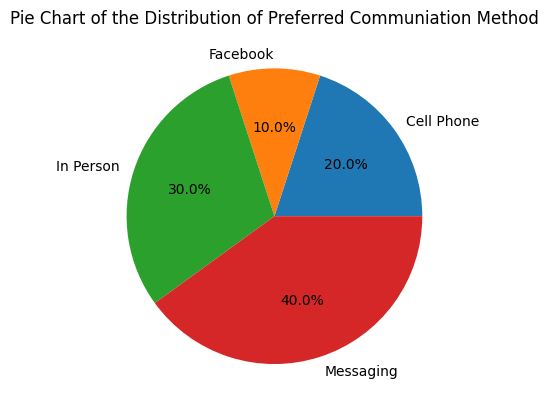

In [3]:
def freq_pie():
    plt.pie([2, 1, 3, 4], labels = ['Cell Phone', 'Facebook', 'In Person', 'Messaging'], autopct='%1.1f%%')
    plt.title("Pie Chart of the Distribution of Preferred Communiation Method")
freq_pie()

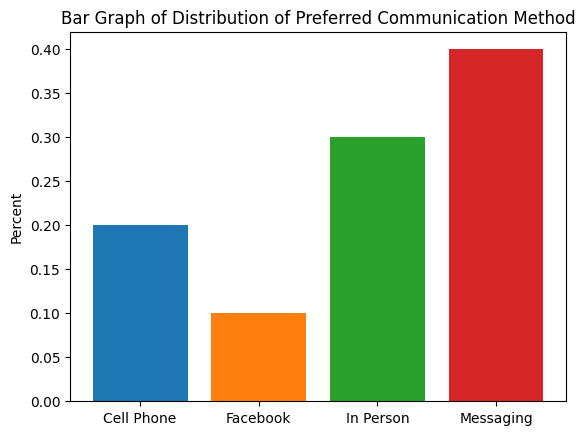

In [4]:
def freq_bar():
    fig, ax = plt.subplots()
    ax.bar(['Cell Phone', 'Facebook', 'In Person', 'Messaging'], [0.20, 0.10, 0.30, 0.40], color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
    ax.set_ylabel('Percent')
    ax.set_title('Bar Graph of Distribution of Preferred Communication Method')
    
    plt.show()
freq_bar()

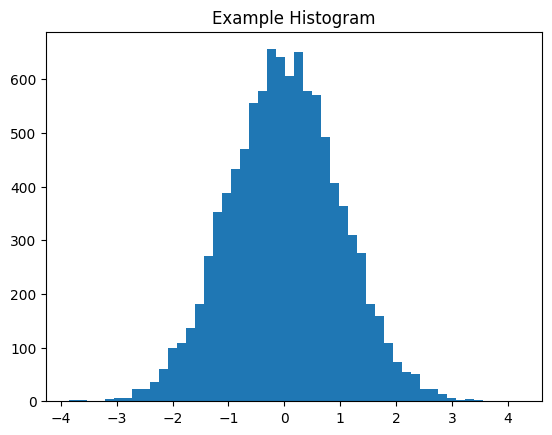

In [5]:
def freq_hist():
    fig, ax = plt.subplots()
    dist = np.random.standard_normal(10000)
    ax.hist(dist, bins = 50)
    
    ax.set_title('Example Histogram')
    plt.show()

freq_hist()
    
    

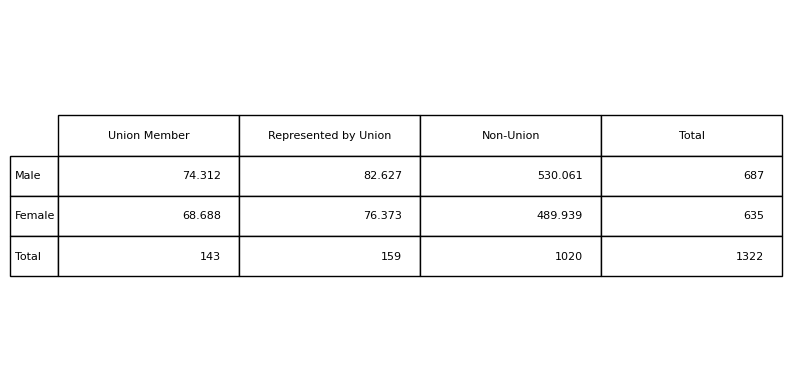

In [6]:
def two_table():
    union_data = [
        [76, 84, 527, 687],
        [67, 75, 493, 635],
        [143, 159, 1020, 1322]
    ]
    
    for row in (0, 1):
        for col in (0, 1, 2):
            union_data[row][col] = round(union_data[row][3] * union_data[2][col] / union_data[2][3], 3)
    cols = ('Union Member', 'Represented by Union', 'Non-Union', 'Total')
    rows = ('Male', 'Female', 'Total')

    # exp. set size
    plt.figure(
            linewidth=2,
            tight_layout={'pad':1},
            figsize=(8,4)
          )
    
    table = plt.table(
        cellText=union_data,
        rowLabels=rows,
        colLabels=cols,
        loc='center'
    )
    
    # scale da table
    table.scale(1, 2)
    
    # hide x and y axes
    ax = plt.gca()
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    
    # hide box
    plt.box(on = None)
    
    
    

two_table()

In [7]:
def graphIt(x, y, xstr, ystr, label, color = 'r'):
    plt.scatter(x, y, c = [color] * len(x), label = label)
    plt.xlabel(xstr)
    plt.ylabel(ystr)
    plt.legend()
    plt.title("Scatter Plot of " + xstr + " vs " + ystr)

def r2(x,y, pred):
    # calculates R^2 for x, y, and the prediction fucntion pred
    y_hat = pred(x) # predicted values using line
    y_bar = np.mean(y)
    ss_nreg = np.sum((y - y_bar)**2) # sum of squared residuals w/out regression
    ss_pred = np.sum((y - y_hat)**2) # sum of squared residuals w/ regression
    
    return 1 - ss_pred/ss_nreg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9999712654548715


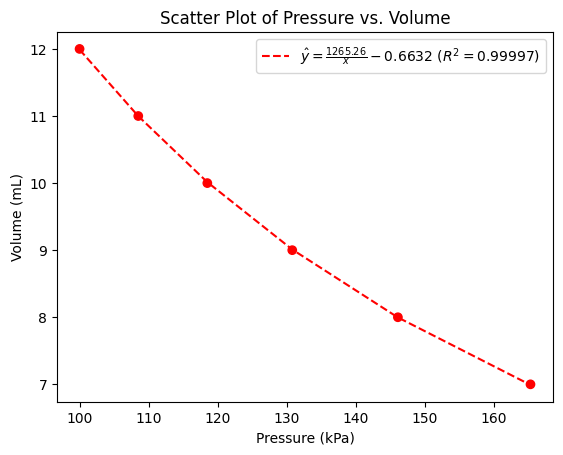

In [21]:
def test():
    volume = [i for i in range(12, 6, -1)] # in mL
    pressure = [100.0, 108.5, 118.5, 130.8, 146.1, 165.3] # kPa

    plt.scatter(pressure, volume, c = ['r'] * 6)
    plt.xlabel("Pressure (kPa)")
    plt.ylabel("Volume (mL)")
    plt.legend()
    plt.title("Scatter Plot of Pressure vs. Volume")
    func = np.poly1d(np.polyfit(np.reciprocal(pressure), volume, 1))
    plt.plot(pressure, (lambda x : [func(1/i) for i in x])(pressure), "--r", label = "$\hat{y} = \\frac{1265.26}{x} - 0.6632$ $(R^2 = 0.99997)$")
    plt.legend()

    print(r2(np.reciprocal(pressure), volume, func))

test()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9999712654548715


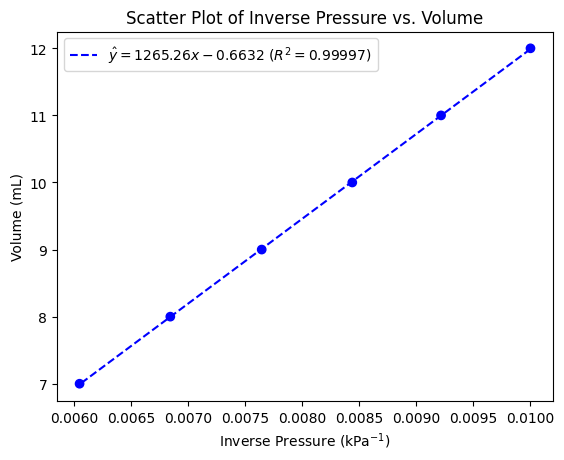

In [30]:
def test2():
    volume = [i for i in range(12, 6, -1)] # in mL
    pressure = [100.0, 108.5, 118.5, 130.8, 146.1, 165.3] # kPa

    plt.scatter(np.reciprocal(pressure), volume, c = ['b'] * 6)
    plt.xlabel("Inverse Pressure (kPa$^{-1}$)")
    plt.ylabel("Volume (mL)")
    plt.legend()
    plt.title("Scatter Plot of Inverse Pressure vs. Volume")
    func = np.poly1d(np.polyfit(np.reciprocal(pressure), volume, 1))
    plt.plot(np.reciprocal(pressure), func(np.reciprocal(pressure)), "--b", label = "$\hat{y} = 1265.26x - 0.6632$ $(R^2 = 0.99997)$")
    plt.legend()

    print(r2(np.reciprocal(pressure), volume, func))

test2()

 
10.12 x + 0.6882
 
35.96 x + 0.97


Text(0.5, 1.0, 'Scatter Plot of Extension vs. Weight')

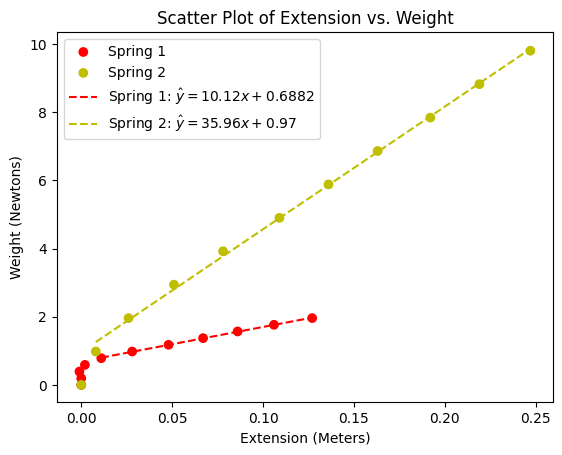

In [9]:
# using for physics homework cause i forgot how matplotlib works

# in newtons
spring_1_weight = [i * 9.8 / 1000 for i in range(0, 220, 20)]
spring_2_weight = [i * 9.8 / 1000 for i in range(0, 1100, 100)]

# in meters
spring_1_extension = [0.000, 0.000, -0.001, 0.002, 0.011, 0.028, 0.048, 0.067, 0.086, 0.106, 0.127]
spring_2_extension = [0.000, 0.008, 0.026, 0.051, 0.078, 0.109, 0.136, 0.163, 0.192, 0.219, 0.247]

# lin reg coefficent
coef_1_noignore = np.polyfit(spring_1_extension, spring_1_weight, 1)
coef_2_noignore = np.polyfit(spring_2_extension, spring_2_weight, 1)

# lin reg coefficent ignoring outlier values
coef_1_ignore = np.polyfit(spring_1_extension[4:], spring_1_weight[4:], 1)
coef_2_ignore = np.polyfit(spring_2_extension[1:], spring_2_weight[1:], 1)

# linreg prediction functions
pred_1_noignore = np.poly1d(coef_1_noignore)
pred_2_noignore = np.poly1d(coef_2_noignore)
pred_1_ignore = np.poly1d(coef_1_ignore)
pred_2_ignore = np.poly1d(coef_2_ignore)

plt.scatter(spring_1_extension, spring_1_weight, c = ['r'] * 11, label = 'Spring 1')
plt.scatter(spring_2_extension, spring_2_weight, c = ['y'] * 11, label = 'Spring 2')

plt.plot(spring_1_extension[4:], pred_1_ignore(spring_1_extension[4:]), '--r', label = 'Spring 1: $\hat{y} = 10.12x + 0.6882$')
print(pred_1_ignore)
plt.plot(spring_2_extension[1:], pred_2_ignore(spring_2_extension[1:]), '--y', label = 'Spring 2: $\hat{y} = 35.96x + 0.97$')
print(pred_2_ignore)

plt.xlabel('Extension (Meters)')
plt.ylabel('Weight (Newtons)')
plt.legend()
plt.title("Scatter Plot of Extension vs. Weight")

In [32]:
class Drug:
    def __init__(
        self,
        nda : int,
        ingredients : str,
        company : str,
        product_name : str,
        approval_date : str,
        first_cliff_expiration_date : str,
        latest_prot_date : str,
        additional_prot_time : str,
        months_additional_prot_time : int,
        num_protections : int,
        unique_patents : int,
        orphan_drug_excl : int,
        extensions : int, 
        num_patent_extensions : int,
        num_exclusivity_extensions : int
    ):
        self.nda = nda
        self.ingredients = ingredients
        self.company = company
        self.product_name = product_name
        self.approval_date = approval_date
        self.first_cliff_expiration_date = first_cliff_expiration_date
        self.latest_prot_date = latest_prot_date
        self.additional_prot_time = additional_prot_time
        self.months_additional_prot_time = months_additional_prot_time
        self.num_protections = num_protections
        self.unique_patents = unique_patents
        self.orphan_drug_excl = orphan_drug_excl
        self.extensions = extensions
        self.num_patent_extensions = num_patent_extensions
        self.num_exclusivity_extensions = num_exclusivity_extensions

In [75]:
# https://sites.uclawsf.edu/evergreensearch/

drugs = [] # List[Drugs]

with open(r"Evergreen Drug Patent Database - UC College of the Law.csv", "r") as file:
    for line in file.read().split('\n'):
        args = [i.replace("\"", "") for i in line.split(',')]
        for i in range(len(args)):
            if args[i].isdigit(): args[i] = int(args[i]) # casts to integer
        drugs.append(Drug(*args))

extend_over_120 : int = 0 # number of drugs extended over 120 months
intersect : int = 0

for drug in drugs:
    if drug.months_additional_prot_time >= 120 and drug.num_protections + drug.num_patent_extensions >= 10:
        intersect += 1
    if drug.months_additional_prot_time >= 120:
        # print(drug.product_name, drug.months_additional_prot_time)
        extend_over_120 += 1

print(f"{extend_over_120} / {len(drugs)}")
print(f"{intersect} / {extend_over_120}")

915 / 2056
567 / 915


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


7


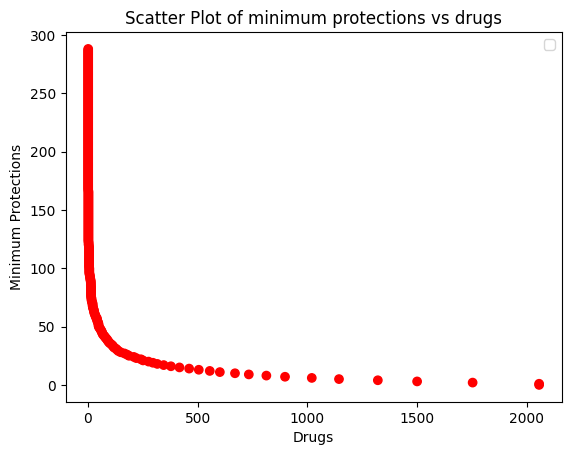

In [ ]:
def drug_protections():
    min_extension = [i for i in range(289)] # min_extension[i] = # of drugs protected at least i times
    num_drugs = [0] * 289
    for num_prot in min_extension:
        for drug in drugs:
            if drug.num_protections >= num_prot: num_drugs[num_prot] += 1
    
    for i in min_extension:
        if abs(915 - num_drugs[i]) < 20: print(i)
    
    plt.scatter(num_drugs, min_extension, c = ['r'] * 289)
    plt.xlabel("Drugs")
    plt.ylabel("Minimum Protections")
    plt.legend()
    plt.title("Scatter Plot of minimum protections vs drugs")
    # func = np.poly1d(np.polyfit(np.reciprocal(pressure), volume, 1))
    # plt.plot(pressure, (lambda x : [func(1/i) for i in x])(pressure), "--r", label = "$\hat{y} = \\frac{1265.26}{x} - 0.6632$ $(R^2 = 0.99997)$")
    # plt.legend()

drug_protections()